### IMPORTING THE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fraudTrain = pd.read_csv("C:\\Users\\anike\\Downloads\\fraudTrain.csv\\fraudTrain.csv")
fraudTest = pd.read_csv("C:\\Users\\anike\\Downloads\\fraudTest.csv\\fraudTest.csv")

In [4]:
fraudTrain.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
fraudTest.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
fraudTrain.size, fraudTest.size

(29823525, 12781537)

In [9]:
fraudTrain.shape

(1296675, 23)

#### It seems that the first column called Unnamed : 0 will not be useful for data analysis. Therefore I would drop it.
Some columns that is not useful in analysis are also removed.

In [17]:
fraudTrain.drop("Unnamed: 0",axis=1,inplace=True)
fraudTest.drop("Unnamed: 0",axis=1,inplace=True)
fraudTrain = fraudTrain.drop(['cc_num','first','last','trans_num'],axis=1)
fraudTest = fraudTest.drop(['cc_num','first','last','trans_num'],axis=1)

In [18]:
from datetime import datetime as dt
fraudTrain["trans_date_trans_time"] = pd.to_datetime(fraudTrain["trans_date_trans_time"])
fraudTrain["trans_date"] = fraudTrain["trans_date_trans_time"].dt.date
fraudTrain["trans_date"]= pd.to_datetime(fraudTrain["trans_date"])

fraudTrain['year'] = fraudTrain['trans_date'].dt.year
fraudTrain['month'] = fraudTrain['trans_date'].dt.month
fraudTrain['day'] = fraudTrain['trans_date'].dt.day

fraudTest["trans_date_trans_time"] = pd.to_datetime(fraudTest["trans_date_trans_time"])
fraudTest["trans_date"] = fraudTest["trans_date_trans_time"].dt.date
fraudTest["trans_date"]= pd.to_datetime(fraudTest["trans_date"])

fraudTest['year'] = fraudTest['trans_date'].dt.year
fraudTest['month'] = fraudTest['trans_date'].dt.month
fraudTest['day'] = fraudTest['trans_date'].dt.day

### Show the number of fraud / normal transactions

In [22]:
fraudTrain["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

### Mean Amount difference between fraud / normal transactions

In [23]:
fraudTrain.groupby("is_fraud")['amt'].mean()

is_fraud
0     67.667110
1    531.320092
Name: amt, dtype: float64

### Gender vs Fraud Case

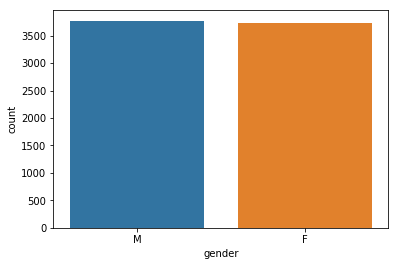

In [30]:
ax = sns.countplot(x="gender",data = fraudTrain[fraudTrain["is_fraud"]==1])

In [31]:
#Gender does not show imply any difference on credit frauds.

In [32]:
fraudTrain.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
year                              int64
month                             int64
day                               int64
dtype: object

In [33]:
fraudTest.dtypes

trans_date_trans_time    datetime64[ns]
merchant                         object
category                         object
amt                             float64
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
trans_date               datetime64[ns]
year                              int64
month                             int64
day                               int64
dtype: object

### Date Conversion

In [35]:
fraudTrain = pd.get_dummies(fraudTrain,columns=['category'],drop_first=True)
fraudTest = pd.get_dummies(fraudTest,columns=['category'],drop_first=True)

fraudTrain.columns = fraudTrain.columns.str.replace(' ', '')
fraudTest.columns = fraudTest.columns.str.replace(' ', '')

train = fraudTrain.select_dtypes(include='number')
test = fraudTest.select_dtypes(include='number')

In [36]:
total = pd.concat([train, test])

In [37]:
X = total.drop("is_fraud",axis=1) 
y = total["is_fraud"]

In [38]:
print(sum(y))

9651


In [39]:
X.dtypes

amt                        float64
zip                          int64
lat                        float64
long                       float64
city_pop                     int64
unix_time                    int64
merch_lat                  float64
merch_long                 float64
year                         int64
month                        int64
day                          int64
category_food_dining         uint8
category_gas_transport       uint8
category_grocery_net         uint8
category_grocery_pos         uint8
category_health_fitness      uint8
category_home                uint8
category_kids_pets           uint8
category_misc_net            uint8
category_misc_pos            uint8
category_personal_care       uint8
category_shopping_net        uint8
category_shopping_pos        uint8
category_travel              uint8
dtype: object

In [40]:
X = X.drop(['zip','lat','long','unix_time','merch_lat','merch_long'],axis=1)

### Machine Learning and Evaluation

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, confusion_matrix, median_absolute_error,classification_report, f1_score,recall_score,precision_score

print("Score the X-train with Y-train is : ", dtc.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", dtc.score(X_test,y_test))

y_pred=dtc.predict(X_test)

print("Accuracy score " , accuracy_score(y_test,y_pred))
print("F1 score: ", round(f1_score(y_test, y_pred, average='weighted')*100,2),"%")

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.9959565895713481
Accuracy score  0.9959565895713481
F1 score:  99.6 %


In [46]:
matrix = classification_report(y_test,y_pred,labels=[1,0])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.61      0.64      0.63      2938
           0       1.00      1.00      1.00    552781

    accuracy                           1.00    555719
   macro avg       0.81      0.82      0.81    555719
weighted avg       1.00      1.00      1.00    555719



In [47]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.612
